# Random Forest


Random Forest is a popular machine learning algorithm that belongs to the ensemble learning category. Ensemble learning involves combining the predictions of multiple models to improve overall performance. In the case of Random Forest, it combines the power of multiple decision trees.

Random Forest is built upon a collection of decision trees. Decision trees are like a series of questions that lead to a decision or prediction. Each tree learns from a subset of the data.

When creating each decision tree, Random Forest doesn't use the entire dataset. Instead, it selects a random subset of the data (with replacement) for each tree. This is known as bagging (Bootstrap Aggregating).

Not only does Random Forest use a random subset of the data for each tree, but it also uses a random subset of features (columns) at each split in the decision tree. This ensures that each tree is diverse and captures different aspects of the data

Once all the decision trees are trained on their respective subsets of data, they "vote" on the predictions. For classification problems, each tree votes for a class, and for regression problems, they predict a value. The final prediction is determined by a majority vote (classification) or averaging (regression) of all the individual tree predictions.

Random forest algo is another popular ML tehnique used in Regression and Classification both.

Now, why is it called Random forest? well the forest has trees, and the trees in the ML world means a Decision Tree, as we have seen in the last Decision Tree tutorial where we try to predict employees salary based on certain fetures and we build a Decision Tree like below
<img src="images/img24.jpg" alt="Image Alt Text" width="600"/>
Well the tree above can be complicated.
<img src="images/img25.jpg" alt="Image Alt Text" width="600"/>
Below you have green samples and red samples and based on that you build a Decision tree, now how can you build a multiple decision tree out of this single dataset, one way is you take the dataset and devide it into batch of random datasets like below
<img src="images/img26.jpg" alt="Image Alt Text" width="600"/>
then you build decision tree for each of them
<img src="images/img27.jpg" alt="Image Alt Text" width="600"/>
so since we did random sampling here, we call it Random Forest, and now we have multiple trees and its like a forest being formed already.

Once its trained, you give the thing that u want to predict and they will all come up with different decisions, So you just take a majority vote out of it and get a decision
<img src="images/img28.jpg" alt="Image Alt Text" width="600"/>
So this is the basic example of a random forest algorithm

We will use SKlearn digit datasets again to make a classification using random forest

# Coding part

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [134]:
data = load_digits()

In [135]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

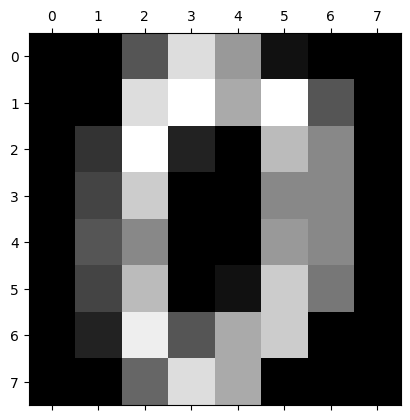

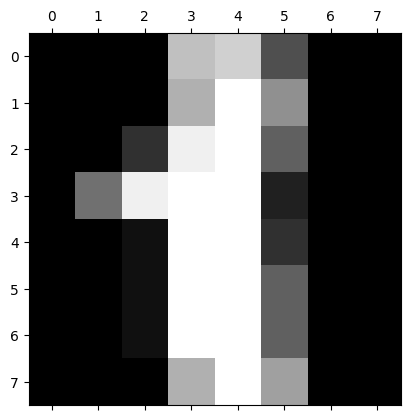

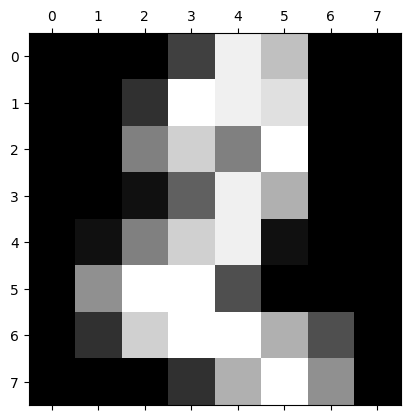

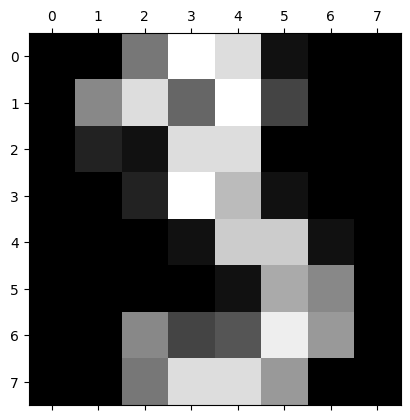

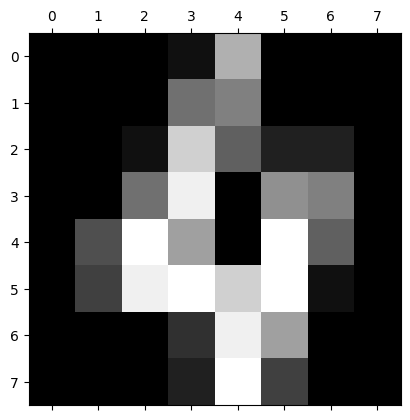

In [136]:
plt.gray()
for i in range(5):
    plt.matshow(data.images[i])

The data is just a 2D array, its a 8x8 metrix so the length is 64

In [137]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Converting it to a DataFrame so its easier to visualize and as you can see it has 64 columns since its 8x8, so its an array of 64 integers and they map to the target variable

In [138]:
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [139]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

Appending the target to out dataframe

In [140]:
df['target'] = data.target

In [141]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


### Splitting into Training and Testing data

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), 
                                                    df.target, test_size=0.2)

In [216]:
len(X_train)

1437

In [217]:
len(X_test)

360

### Model and training

Now we can use the Random Forest algorithm, we import it from ensamble, ensamble is a term used when you are using multiple algorithms to predict the outcome cuz thats what we are doing here, we are building multiple decision tree and taking a majority vote to come up with a decision, so thats why its called ensamble

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
model = RandomForestClassifier()

In [235]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [236]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

When you train your model, you can see all the parameters above, for example we have already seen 'gini'.

Now theres an 'n_estimators : 10', so here 10 means use 10 random trees, so we will see the performance using 10 random trees 

In [237]:
model.score(X_test, y_test)

0.9694444444444444

So as seen below, you can fine tune your model by tweaking some parameters

In [238]:
new_model = RandomForestClassifier(n_estimators=43)
new_model.fit(X_train, y_train)
new_model.score(X_test, y_test)

0.9722222222222222

### Plot Confusion matrix

To see how our model performed where it performed well or not well.

Confusion matrix allows you to plot truth/actual value on one axis and the predicted value on other axis.

Using seaborn to plot it

In [239]:
predict = model.predict(X_test)

In [240]:
from sklearn.metrics import confusion_matrix

In [241]:
cm = confusion_matrix(y_test, predict)
cm

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  2,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 39]], dtype=int64)

In [242]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

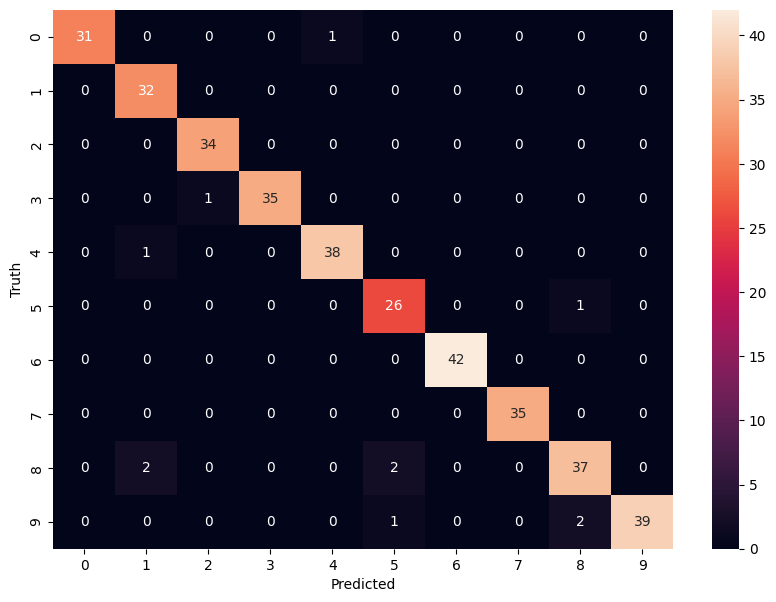

In [243]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

As you can see above there is 11 wrong, now if we count the num of wrong prediction below it also says 11 wrong.

we had to convert predict and y_test to same data type below since y_test is an np array

In [246]:
import numpy as np

# Assuming predict and y_test are NumPy arrays
# Convert the arrays to the same data type if needed
predict1 = predict.astype(np.int32)  # Adjust the data type if necessary
y_test1 = y_test.astype(np.int32)

# Count the number of wrong predictions
wrong_predictions_count = np.sum(predict1 != y_test1)

# Print the count of wrong predictions
print(f"Number of wrong predictions: {wrong_predictions_count}")


Number of wrong predictions: 11
